# Basic diffusion model

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2DTranspose, Conv2D
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt



In [2]:
#define the diffusion Model architecture
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(64,(3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128,(3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
output_layer = Reshape((28, 28, 1))(x)


diffusion_M = Model(input_layer, output_layer)


#compiling the model
diffusion_M.compile(optimizer='adam', loss='binary_crossentropy')



I0000 00:00:1759152739.998717  425375 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2179 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [6]:
#Loading and preprocessing the date

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


#add noise to the images
noise_factor = 0.5
x_train_N = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_N = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_N = np.clip(x_train_N, 0., 1.)
x_test_N = np.clip(x_test_N, 0., 1.)

#train the model
diffusion_M.fit(x_train_N, x_train,
                epochs=20, 
                batch_size=128, 
                shuffle=True,
                validation_data=(x_test_N, x_test) )

2025-09-29 19:18:05.701747: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-09-29 19:18:06.419832: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-09-29 19:18:06.596905: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-09-29 19:18:06.667232: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20


2025-09-29 19:18:07.858087: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f8ca80071a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-29 19:18:07.858108: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-09-29 19:18:07.880825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-29 19:18:08.021706: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-09-29 19:18:08.332416: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[128,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_t

  6/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.6589

I0000 00:00:1759153691.215140  458728 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2317

2025-09-29 19:18:22.790498: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[96,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,1,28,28]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-09-29 19:18:22.805514: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[96,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,64,28,28]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2313

2025-09-29 19:18:25.283507: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.
2025-09-29 19:18:25.564025: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[128,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-09-29 19:18:25.580950: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[128,128,28,28]{3,2,1,0}, u8[0]{0}) custom

469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.2311 - val_loss: 0.1164
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1142 - val_loss: 0.1069
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1059 - val_loss: 0.1036
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.1015 - val_loss: 0.1020
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0980 - val_loss: 0.1011
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0950 - val_loss: 0.1017
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0921 - val_loss: 0.1027
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0893 - val_loss: 0.1038
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0868 - val_loss: 0.1056
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0842 - val_loss: 0.1080
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0823 - val_loss: 0.1096
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

# optional plotting the data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


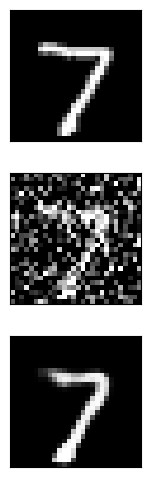

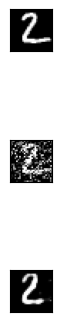

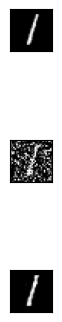

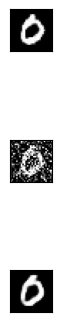

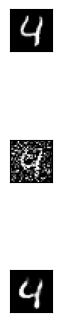

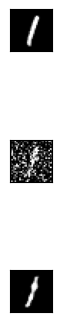

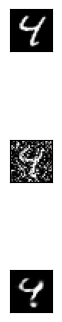

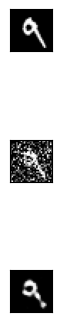

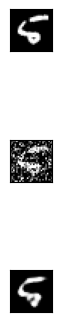

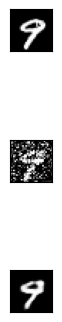

In [9]:
#predict the denoised images
denoised_IM = diffusion_M.predict(x_test_N)

#visualize the results
n = 10 #number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    #display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


#display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_N[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#display denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_IM[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()


# fine tuning the diffusion model

In [ ]:
#unfreeze some layers and recompile the model
for layer in diffusion_M.layers[-4:]:
    layer.trainable = True

#recompile the model
diffusion_M.compile(optimizer='adam', loss='binary_crossentropy')  

#train the model again
diffusion_M.fit(x_train_N, x_train, 
                epochs=10, 
                batch_size=128,
                shuffle=True, 
                validation_data=(x_test_N, x_test,))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - loss: 0.0721 - val_loss: 0.1371
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0715 - val_loss: 0.1374
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0717 - val_loss: 0.1380
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0716 - val_loss: 0.1380
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0716 - val_loss: 0.1389
Epoch 6/10
269/469 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0715

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


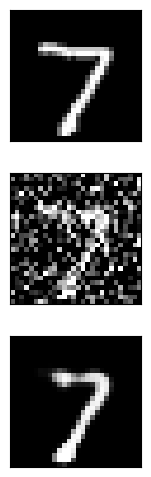

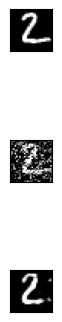

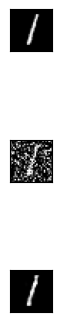

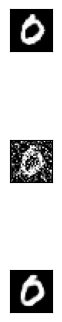

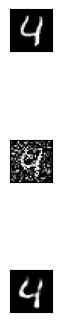

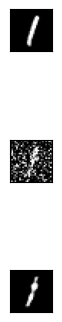

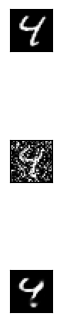

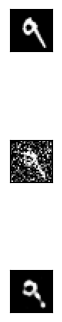

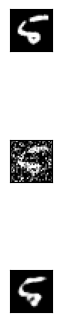

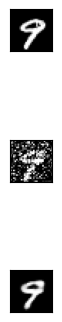

In [11]:
#predict the denoised images
denoised_IM = diffusion_M.predict(x_test_N)

#visualize the results
n = 10 #number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    #display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


#display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_N[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#display denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_IM[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()
